## Kmeans clustering algorithm

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

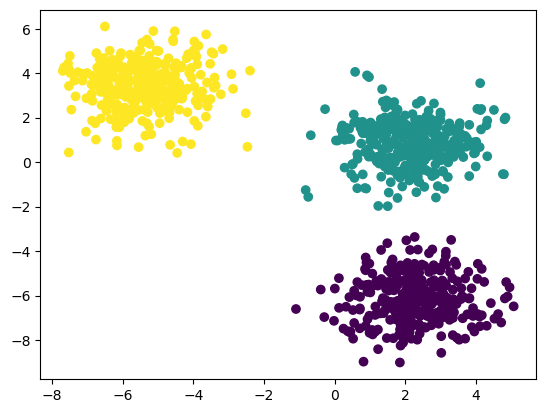

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
## standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train_Scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.cluster import KMeans



In [12]:
#elbow method to select K value:

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_Scaled)
    wcss.append(kmeans.inertia_)


In [13]:
wcss

[1340.0000000000011,
 413.99399826201915,
 91.18553269862593,
 82.57005824434421,
 69.0279297986396,
 60.20466513167333,
 70.35217707611075,
 45.14229290711538,
 45.34941739861432,
 36.71004684391727]

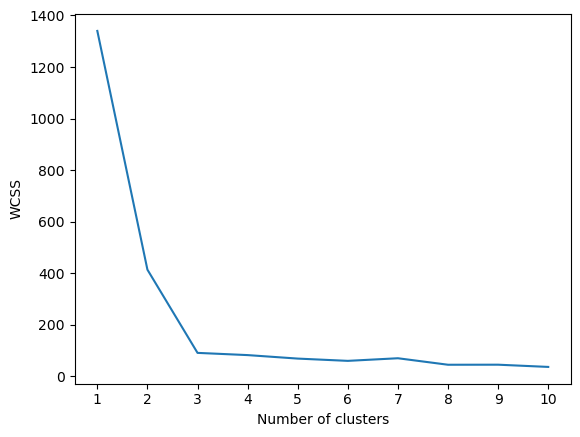

In [14]:
## plot elbow curve:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [17]:
kmeans.fit_predict(X_train_Scaled)

array([2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0,
       0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0,

In [19]:
y_pred=kmeans.predict(X_test_scaled)

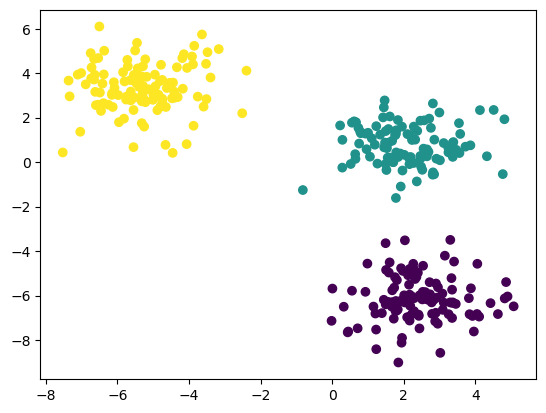

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
#validating the k values:

#1.knee locator
#2.silhoutee scoring



In [21]:
#knee locator

!pip install kneed

In [22]:
from kneed import KneeLocator

In [24]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [25]:
k1.elbow

3

In [27]:
#sihoutter score:

from sklearn.metrics import silhouette_score

silhoutte_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_Scaled)
    score=silhouette_score(X_train_Scaled,kmeans.labels_)
    silhoutte_coefficients.append(score)


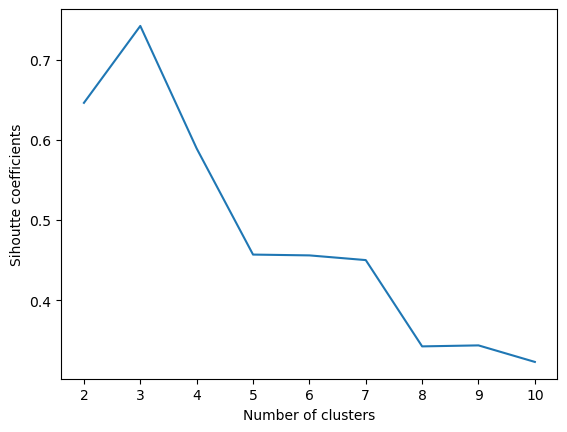

In [29]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Sihoutte coefficients")
plt.show()